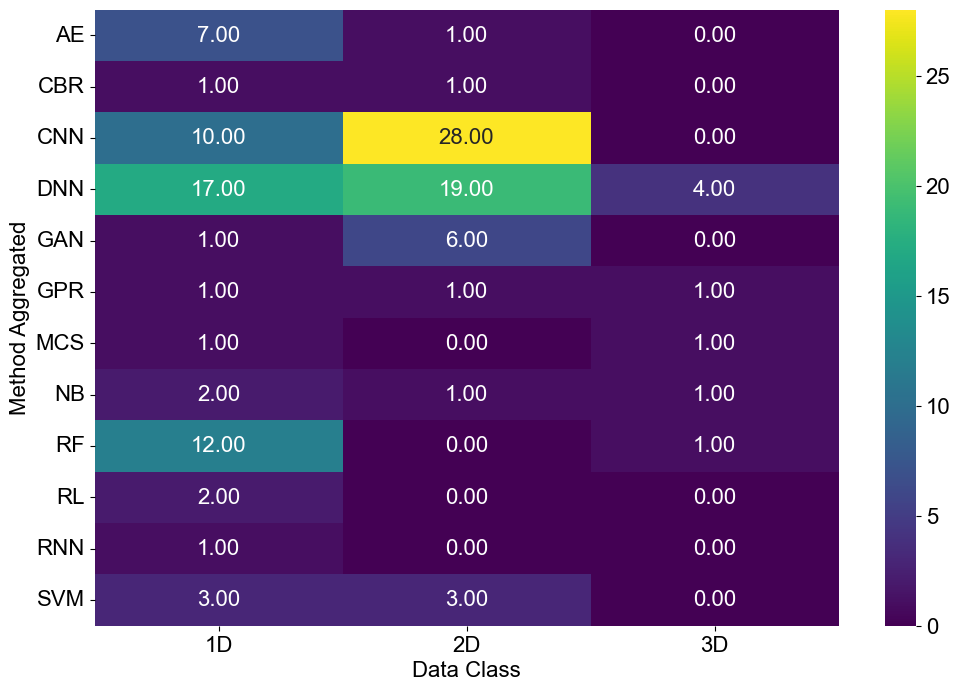

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'

# Load the Excel file
# Replace 'your_excel_file.xlsx' with the path to your actual Excel file
df = pd.read_excel('./data.xlsx', sheet_name='rawlist')
df.replace({'time series':'1D', '2d': '2D', '3d': '3D'}, regex=True, inplace=True)

agg_data = df.groupby(['Data class', 'Method aggregated']).size().reset_index(name='Count')

agg_data["Data Class"] = agg_data["Data class"]
agg_data["Method Aggregated"] = agg_data["Method aggregated"]

# Pivot the data for the heatmap
heatmap_data = agg_data.pivot(columns='Data Class', index='Method Aggregated', values='Count')

# Fill NaN values with zero
heatmap_data.fillna(0, inplace=True)

# Creating the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")

#plt.title('Heatmap of Percentage Distribution')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.savefig('heatmap.svg', format='svg')
plt.show()
